In [1]:
import nbsetup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from models import sparc

In [2]:
from references import sparc as sparc_import

In [3]:
profiles = sparc.generate_profiles()

In [4]:
profiles['CamB'].rar_dict

{'ID': 168,
 'Galaxy': 'CamB',
 'L': 7.88,
 'Ydisk': 0.34,
 'e_Ydisk': 0.08,
 'Ybul': 0.0,
 'e_Ybul': 0.0,
 'D': 2.83,
 'e_D': 0.3,
 'D/D0': 0.84,
 'Inc': 26.9,
 'e_Inc': 2.3,
 'i/i0': 0.41,
 'X2': 5.758}

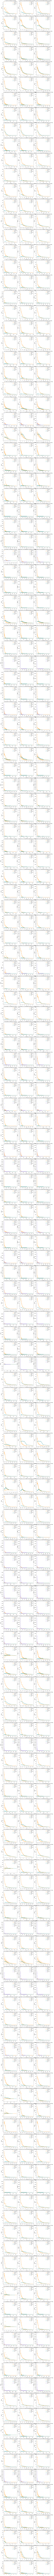

In [3]:
fig, axes = plt.subplots(len(profiles), 3, figsize=(15, 5*len(profiles)))
i = 0
for uid, prof in profiles.items():
    prof.auto_fit = False
    prof.plot(index=i, ax=axes[i][0])
    prof.auto_fit = True
    prof.plot(index=i, ax=axes[i][1])
    prof.rar_fit = True
    prof.plot(index=i, ax=axes[i][2])
    i += 1

In [234]:
good_examples = ['IC2574', 'NGC5985','DDO064', 'DDO161', 'F568-3']

In [235]:
points = 5000

simulations = {}
for i, uid in enumerate(good_examples):
    nbsetup.cp(i)
    prof = profiles[uid]
    
    space = Space((1,points,points), prof.max_r*4/points)
    masses, labels = prof.masses(space)
    
    sim = Galaxy(masses, space, mass_labels=labels)
    sim.profile = prof
    sim.name = uid
    sim.analyse(sim.radius_points(prof.max_r*1.5, 20))
    simulations[uid] = sim

nbsetup.cp("")

In [237]:
unity_mass_ratio = {'gas': 1, 'disk': 1, 'bul': 1}

def plot_sparc(self, ax=None):
    
    for k in ('Vobs', 'Vgas', 'Vdisk', 'Vbul'):
        if k != 'Vbul' or self.profile.is_bul:
            sns.scatterplot(x=self.profile.rotmass_df['R'], y=self.profile.rotmass_df[k], label=k, ax=ax, color=COLOR_SCHEME[k[1:]])
    
    df = self.dataframe(mass_ratios=unity_mass_ratio)
    
    for k in self.mass_labels:
        cdf = df.query("component=='%s'" % k)
        vel2 = (cdf['rd']*cdf['x_vec'])
        g = sns.lineplot(x=cdf['rd'], y=np.sign(vel2)*(np.abs(vel2)**0.5), ax=ax, label=k, color=COLOR_SCHEME[k])
        
    g.set(title=self.profile.sparc_dict['Vflat'])

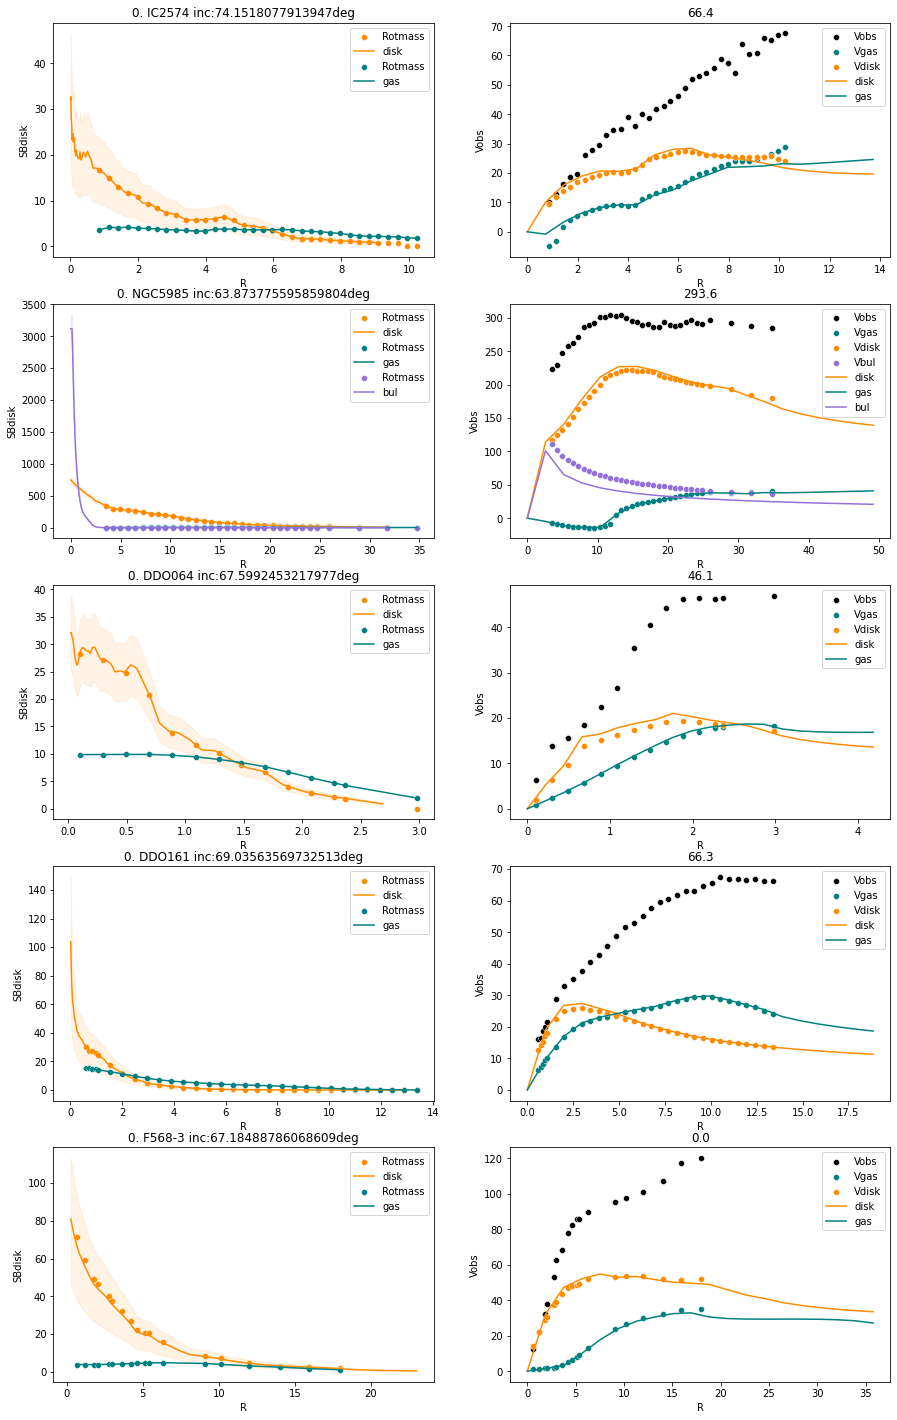

In [238]:
fig, axes = plt.subplots(len(simulations), 2, figsize=(15,5*len(simulations)))

for index, sim in enumerate(simulations.values()):
    sim.profile.plot(ax=axes[index][0])
    plot_sparc(sim, ax=axes[index][1])